### 1. Problem Statement
The fatigue dataset has the chemical composition, process condition and fatigue strength of metals. The goal of this project is to predict fatigue strength based on chemical composition and process condition.

Success will be measured with r2 score and the objective is to get a r2 score > 0.9

### 2. Data extraction
data resource from Exploration of data science techniques to predict fatigue strength of steel from composition and processing parameters

### 3. Exploratory Data Analysis
### 4. Feature Engineering
### 5. Feature Selection
### 6. Model Selection
### 7. Model tuning
### 8. Model serving (if applicable)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import tensorflow as tf
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### 2. Data extraction

In [2]:
data_set = pd.read_excel("Fatigue.xlsx")

In [3]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 27 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sl. No.   437 non-null    int64  
 1   NT        437 non-null    int64  
 2   THT       437 non-null    int64  
 3   THt       437 non-null    int64  
 4   THQCr     437 non-null    int64  
 5   CT        437 non-null    int64  
 6   Ct        437 non-null    float64
 7   DT        437 non-null    float64
 8   Dt        437 non-null    float64
 9   QmT       437 non-null    int64  
 10  TT        437 non-null    int64  
 11  Tt        437 non-null    int64  
 12  TCr       437 non-null    float64
 13  C         437 non-null    float64
 14  Si        437 non-null    float64
 15  Mn        437 non-null    float64
 16  P         437 non-null    float64
 17  S         437 non-null    float64
 18  Ni        437 non-null    float64
 19  Cr        437 non-null    float64
 20  Cu        437 non-null    float6

In [4]:
# split in train and test
#from sklearn.model_selection import train_test_split

#train_set, test_set = train_test_split(data_set, test_size=0.2, random_state=42)
#data_set = train_set

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data_set, data_set["CT"]):
    strat_train_set = data_set.loc[train_index]
    strat_test_set = data_set.loc[test_index]
    
data_set = strat_train_set

In [5]:
strat_train_set['CT'].value_counts() / len(strat_train_set)

30     0.891117
930    0.108883
Name: CT, dtype: float64

In [6]:
strat_test_set["CT"].value_counts() / len(strat_test_set)

30     0.886364
930    0.113636
Name: CT, dtype: float64

### 3. Exploratory Data Analysis

- Data Shape
- Data Types
- Target variable
- Missing Values
- Constant features
- Cardinality
- Duplicate features
- Correlations
- Scale
- Distributions (skewness)
- Outliers

In [7]:
data_set.head(3)

,Sl. No.,NT,THT,THt,THQCr,CT,Ct,DT,Dt,QmT,...,S,Ni,Cr,Cu,Mo,RedRatio,dA,dB,dC,Fatigue
128,129,870,855,30,8,30,0.0,30.0,0.0,30,...,0.011,0.05,1.09,0.04,0.0,1120,0.02,0.0,0.01,503
194,195,870,855,30,8,30,0.0,30.0,0.0,30,...,0.015,0.04,1.06,0.05,0.2,530,0.03,0.0,0.00,551
283,284,900,845,30,8,30,0.0,30.0,0.0,30,...,0.004,2.64,0.75,0.05,0.0,420,0.00,0.0,0.02,570


In [8]:
data_set.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349 entries, 128 to 231
Data columns (total 27 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sl. No.   349 non-null    int64  
 1   NT        349 non-null    int64  
 2   THT       349 non-null    int64  
 3   THt       349 non-null    int64  
 4   THQCr     349 non-null    int64  
 5   CT        349 non-null    int64  
 6   Ct        349 non-null    float64
 7   DT        349 non-null    float64
 8   Dt        349 non-null    float64
 9   QmT       349 non-null    int64  
 10  TT        349 non-null    int64  
 11  Tt        349 non-null    int64  
 12  TCr       349 non-null    float64
 13  C         349 non-null    float64
 14  Si        349 non-null    float64
 15  Mn        349 non-null    float64
 16  P         349 non-null    float64
 17  S         349 non-null    float64
 18  Ni        349 non-null    float64
 19  Cr        349 non-null    float64
 20  Cu        349 non-null    floa

This dataset has:
- 27 features, all are numerical
- 349 observations
- no missing values

The target variable is ['Fatigue']

#### Feature Details
- C: % Carbon
- Si: % Silicon
- Mn: % Manganese
- P: % Phosphorus
- S: % Sulphur
- Ni: % Nickel
- Cr: % Chromlum
- Cu: % Copper
- Mo: % Molybdenum
- NT: Nomalizing Temperature
- THT: Through Hardening Temperature
- THt: Through Hardening Time
- THQCr: Cooling Rate for Through Hardening
- CT: Carburization Temperature
- Ct: Carburization Time
- DT: Diffusion Temperature
- QmT: Quenching Media Temperature (for Carburization)
- TT: Tempering Temperature
- Tt: Tempering Time
- TCr: Cooling Rate for Tempering
- RedRatio: Reduction Ratio (Ingot to Bar)
- dA: Area Proportion of Inclusions Deformed by Plastic Work
- dB: Area Proportion of Inclusions Occuring in Discontinuous Array
- dC: Area Proportion of Isolated Inclusions
- Fatigue: Rotating Bending Fatigue Strength (10^7 cycles)

In [9]:
#constant features
data_set.nunique().sort_values(ascending=False)

Sl. No.     349
Fatigue     215
Cr           64
Mn           52
Ni           42
C            39
RedRatio     33
S            26
Si           25
P            24
Cu           21
dA           20
Mo           15
TT           13
Ct           12
dC           10
dB            7
NT            7
Dt            7
DT            7
THT           5
THQCr         3
TCr           3
Tt            3
QmT           3
CT            2
THt           2
dtype: int64

This dataset has:

- 2 binary features: ['CT'], ['THt']
- ['Sl. No.'] has as many unique values as observations in our dataset. Judging by the name, it may be ordinal and we may drop this feature.

In [10]:
# high level statistics for numerical variables
desc = data_set.describe()
desc

,Sl. No.,NT,THT,THt,THQCr,CT,Ct,DT,Dt,QmT,...,S,Ni,Cr,Cu,Mo,RedRatio,dA,dB,dC,Fatigue
count,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,...,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000
mean,216.292264,872.707736,735.859599,25.873926,10.613181,127.994269,40.112321,122.991057,4.817192,35.329513,...,0.014822,0.519513,0.574441,0.067679,0.069484,900.713467,0.046590,0.003582,0.007593,550.283668
std,126.432893,25.854155,282.421498,10.347199,7.846366,280.745088,126.749330,266.489802,15.620534,18.959053,...,0.006341,0.854978,0.412704,0.049031,0.088261,502.137979,0.030924,0.008322,0.010185,185.970713
min,1.000000,825.000000,30.000000,0.000000,0.000000,30.000000,0.000000,30.000000,0.000000,30.000000,...,0.003000,0.010000,0.010000,0.010000,0.000000,240.000000,0.000000,0.000000,0.000000,225.000000
25%,110.000000,865.000000,845.000000,30.000000,8.000000,30.000000,0.000000,30.000000,0.000000,30.000000,...,0.010000,0.020000,0.120000,0.020000,0.000000,530.000000,0.020000,0.000000,0.000000,443.000000
50%,216.000000,870.000000,845.000000,30.000000,8.000000,30.000000,0.000000,30.000000,0.000000,30.000000,...,0.015000,0.050000,0.720000,0.060000,0.000000,740.000000,0.040000,0.000000,0.000000,508.000000
75%,326.000000,870.000000,855.000000,30.000000,8.000000,30.000000,0.000000,30.000000,0.000000,30.000000,...,0.020000,0.460000,0.980000,0.100000,0.170000,1120.000000,0.070000,0.000000,0.010000,577.000000
max,436.000000,930.000000,865.000000,30.000000,24.000000,930.000000,540.000000,903.333000,70.200000,140.000000,...,0.030000,2.780000,1.170000,0.260000,0.240000,5530.000000,0.130000,0.050000,0.058000,1144.000000


In [11]:
desc.iloc[[1,5, 3, 7], 1::].T

,mean,50%,min,max
NT,872.707736,870.000,825.000,930.000
THT,735.859599,845.000,30.000,865.000
THt,25.873926,30.000,0.000,30.000
THQCr,10.613181,8.000,0.000,24.000
CT,127.994269,30.000,30.000,930.000
Ct,40.112321,0.000,0.000,540.000
DT,122.991057,30.000,30.000,903.333
Dt,4.817192,0.000,0.000,70.200
QmT,35.329513,30.000,30.000,140.000
TT,536.017192,600.000,30.000,680.000


- ['SI.No.'] mean and median are the same making the symmetrical normal and it seems to be ordinal with a unique value per observation, making the variable irrelevant.
- left tail (median>mean): ['THT'], ['THt'], ['TT'], ['TCr'], ['C'], ['P'], ['S'], ['Ni'], ['Cr']
- right tail (mean>median): ['NT'], ['THQCr'], ['CT'], ['Ct'], ['DT'], ['Dt'], ['QmT'], ['Tt'], ['Si'], ['Mn'], ['Cu'], ['Mo'], ['RedRatio'], ['dA'], ['dB'], ['dC'], ['Fatigue']  
- 4 order of magnitude: ['RedRatio'], ['Fatigue']
- 3 order of magnitude: ['NT'], ['THT'], ['CT'], ['Ct'], ['DT'], ['QmT'], ['TT'], ['Tt']
- 2 order of magnitude: ['THt'], ['THQCr'], ['Dt'], ['TCr']
- 1 order of magnitude: ['C'], ['Si'], ['Mn'], ['P'], ['S'], ['Ni'], ['Cr'], ['Cu'], ['Mo'], ['dA'], ['dB'], ['dC']
- scaling is required

<AxesSubplot:>

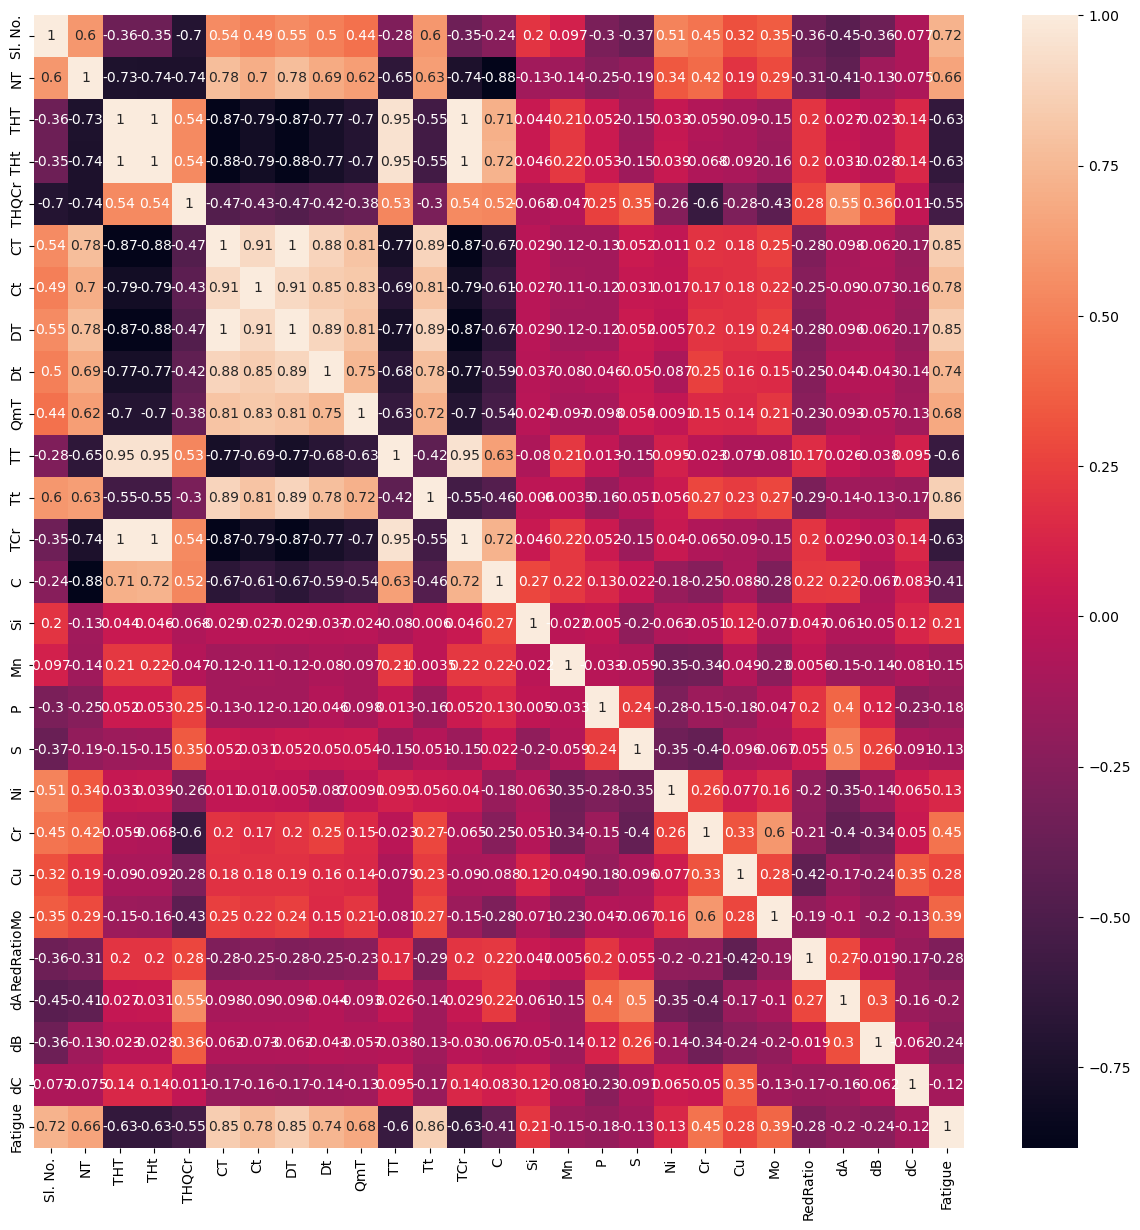

In [12]:
pearcorr = data_set.corr()
plt.figure(figsize=(15,15), dpi=100)
sns.heatmap(pearcorr, annot=True)

- There are many features have correlation > 0.9, which can be dropped. 
- For example, ['THT'], ['THt'], ['TCr'], ['TT'] and ['CT'], ['Ct'], ['DT'], ['Tt']

In [13]:
data_set.corr(method='pearson')['Fatigue'].sort_values(key=lambda x:abs(x))

dC         -0.117230
S          -0.125736
Ni          0.133613
Mn         -0.151642
P          -0.178345
dA         -0.201276
Si          0.211210
dB         -0.235510
Cu          0.277999
RedRatio   -0.280050
Mo          0.394502
C          -0.414389
Cr          0.446629
THQCr      -0.550585
TT         -0.601295
TCr        -0.626156
THt        -0.631872
THT        -0.632855
NT          0.657412
QmT         0.683008
Sl. No.     0.720835
Dt          0.740245
Ct          0.776997
DT          0.848971
CT          0.850021
Tt          0.861489
Fatigue     1.000000
Name: Fatigue, dtype: float64

- Processing parameters are more relevant
- Chemical compositions and reduction ratio are less relevant
- The most relevant chemical compositions are Cr, C and Mo

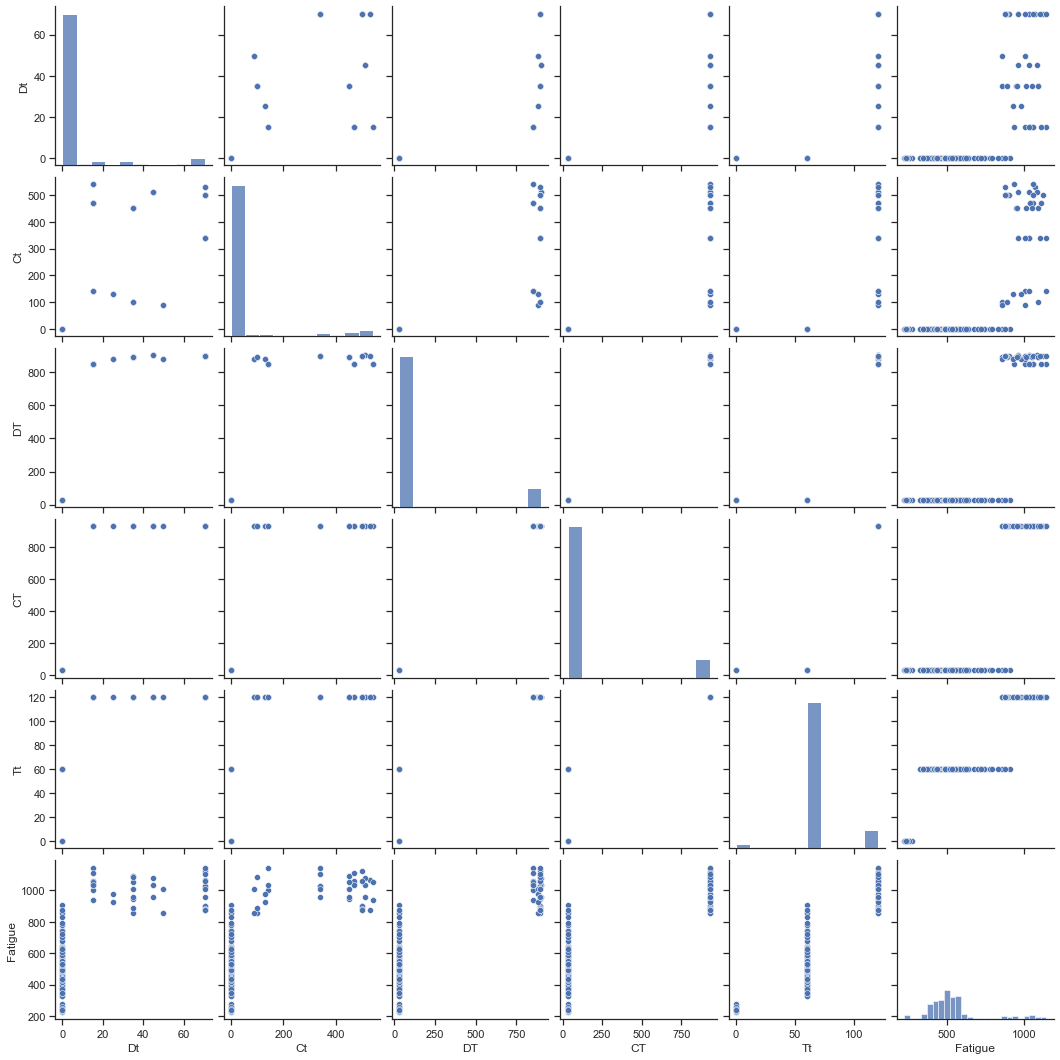

In [14]:
sns.set_theme(style="ticks")
sns.pairplot(data_set[['Dt', 'Ct', 'DT', 'CT', 'Tt', 'Fatigue']])

### 4. Feature Engineering

- Split data in train and validation
- Missing values imputation
- Deal with outliers
- Encoding
- Variance Stabilizing Transformations
- Scaling

In [15]:
# Split in train and validation
y = strat_train_set['Fatigue']
X = strat_train_set.drop(columns=['Fatigue', 'Sl. No.'])

In [16]:
# Numerical imputation
from feature_engine.imputation import MeanMedianImputer

num_imputer = MeanMedianImputer()

In [17]:
# Deal with outliers
from feature_engine.outliers import Winsorizer

capper = Winsorizer(capping_method="iqr", tail="both")

In [18]:
# Variance Stabilizing Transformations
from feature_engine.transformation import YeoJohnsonTransformer

yeo_trans = YeoJohnsonTransformer()

In [19]:
# Scale
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

### 5. Feature Selection
- Drop Duplicate
- Drop Constant/Quasi constant
- Drop correlated
- Embedded methods

In [20]:
from feature_engine.selection import DropConstantFeatures, SmartCorrelatedSelection, DropDuplicateFeatures

# Drop constant
drop_const = DropConstantFeatures()

# Drop duplicates
drop_dup = DropDuplicateFeatures()

# Drop correlated
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

drop_corr = SmartCorrelatedSelection(method='pearson', threshold = 0.95,
                                     selection_method='model_performance',
                                     estimator=linreg)

In [21]:
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(num_imputer,
                   #  capper,
                  #   yeo_trans,
                     scaler,
                     drop_const,
                     drop_dup,
                     drop_corr
                    )
X_tr = pipe.fit_transform(X, y)

In [22]:
X_tr

,0,2,3,4,5,7,8,9,10,12,...,15,16,17,18,19,20,21,22,23,24
0,-0.104882,0.399335,-0.333522,-0.349552,-0.316924,-0.308831,-0.28151,0.385236,-0.221581,0.152024,...,-0.532842,-0.603697,-0.549941,1.251015,-0.565328,-0.788391,0.437333,-0.861082,-0.430985,0.236666
1,-0.104882,0.399335,-0.333522,-0.349552,-0.316924,-0.308831,-0.28151,0.385236,-0.221581,0.258563,...,-0.337093,0.028058,-0.561654,1.178219,-0.361084,1.480875,-0.739330,-0.537249,-0.430985,-0.746625
2,1.057140,0.399335,-0.333522,-0.349552,-0.316924,-0.308831,-0.28151,0.084189,-0.221581,-0.700288,...,0.445905,-1.709268,2.483728,0.425997,-0.361084,-0.788391,-0.958708,-1.508750,-0.430985,1.219956
3,-0.104882,0.399335,-0.333522,-0.349552,-0.316924,-0.308831,-0.28151,0.385236,-0.221581,-0.061054,...,-0.728591,-1.235452,-0.573367,-1.078446,0.047403,-0.788391,-0.579783,-0.537249,-0.430985,0.236666
4,-0.104882,0.399335,-0.333522,-0.349552,-0.316924,-0.308831,-0.28151,0.686282,-0.221581,0.365102,...,-0.337093,1.133629,-0.538228,-0.981386,0.047403,-0.788391,-0.839047,-0.861082,-0.430985,-0.746625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,-0.104882,0.399335,-0.333522,-0.349552,-0.316924,-0.308831,-0.28151,0.385236,-0.221581,0.471641,...,-0.728591,0.343935,-0.585080,-0.932855,-0.973815,-0.788391,1.673826,0.758086,-0.430985,-0.746625
345,-1.847913,0.399335,1.708567,-0.349552,-0.316924,-0.308831,-0.28151,0.084189,-0.221581,1.537031,...,0.641654,1.765384,-0.585080,-1.102712,-1.178059,-0.788391,0.736484,1.405754,-0.430985,-0.746625
346,-0.104882,0.399335,-0.333522,-0.349552,-0.316924,-0.308831,-0.28151,0.686282,-0.221581,0.152024,...,-0.337093,2.081261,-0.327394,0.935567,0.660134,1.253948,-0.779217,-0.213415,-0.430985,2.203247
347,-0.104882,0.399335,-0.333522,-0.349552,-0.316924,-0.308831,-0.28151,0.385236,-0.221581,-0.380671,...,0.837403,0.343935,-0.514802,1.008362,2.294083,1.367412,0.437333,-0.537249,-0.430985,0.236666


### 6. Model Selection

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from xgboost import XGBRFRegressor
from xgboost import plot_importance
from sklearn.metrics import mean_squared_error, make_scorer, r2_score
from sklearn.model_selection import GridSearchCV

In [24]:
lr = LinearRegression()
svr = SVR(kernel="linear", C=10, gamma=0.1, epsilon=0.1)
knr = KNeighborsRegressor()
dt = DecisionTreeRegressor()
rfr = RandomForestRegressor(max_depth=8,random_state=42)
xgb = XGBRegressor(objective = 'reg:squarederror', random_state =27)

In [25]:
models = [lr, svr, knr, dt, rfr, xgb]

In [26]:
from sklearn.model_selection import cross_val_score

In [27]:
for model in models:
    
    scores = cross_val_score(model, 
                         X_tr, 
                         y, 
                         scoring="r2", 
                         cv = 5)
    
    print(scores.mean())

0.9611435412241466
0.9565527316486298
0.9122326656526466
0.9592358255224388
0.9681807132229926
0.972050357314323


### 7. Model tuning
- SVR
- RandomForest
- XGBoost

In [ ]:
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear', 'reg:squarederror'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [4, 5, 6, 7],
              'min_child_weight': [4, 5, 6],
              'silent': [1],
              'subsample': [0.6, 0.7, 0,8],
              'colsample_bytree': [0.6, 0.7, 0.8],
              'n_estimators': [100, 300, 500]}

xgb_reg = XGBRegressor()

grid_search = GridSearchCV(xgb_reg, parameters,
                           scoring='r2',
                           n_jobs = 5,
                           verbose=True,
                           return_train_score=True,
                           cv=5,
                          )

grid_search.fit(X_tr, y)

Fitting 5 folds for each of 2592 candidates, totalling 12960 fits


In [63]:
grid_search.best_params_

{'colsample_bytree': 0.6,
 'learning_rate': 0.03,
 'max_depth': 7,
 'min_child_weight': 4,
 'n_estimators': 500,
 'nthread': 4,
 'objective': 'reg:linear',
 'silent': 1,
 'subsample': 0.7}

In [64]:
grid_search.best_score_

0.977164059295362

In [65]:
# feature importances 
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.42370227, 0.07629845, 0.02351787, 0.23659827, 0.09632153,
       0.00300094, 0.06728153, 0.02069309, 0.00179356, 0.00484766,
       0.0018974 , 0.00128125, 0.00168674, 0.00110236, 0.00091332,
       0.0265021 , 0.00104422, 0.0036218 , 0.00174494, 0.00136654,
       0.00395457, 0.00082969], dtype=float32)

In [66]:
attrs = list(X)
sorted(zip(attrs, feature_importances), reverse=True)

[('Tt', 0.0018974025),
 ('TT', 0.0048476597),
 ('THt', 0.023517866),
 ('THT', 0.07629845),
 ('THQCr', 0.23659827),
 ('TCr', 0.0012812528),
 ('Si', 0.0011023638),
 ('S', 0.0010442159),
 ('RedRatio', 0.00082968984),
 ('QmT', 0.0017935643),
 ('P', 0.026502104),
 ('Ni', 0.0036218013),
 ('NT', 0.42370227),
 ('Mo', 0.003954568),
 ('Mn', 0.0009133213),
 ('Dt', 0.020693092),
 ('DT', 0.06728153),
 ('Cu', 0.0013665399),
 ('Ct', 0.0030009414),
 ('Cr', 0.0017449375),
 ('CT', 0.09632153),
 ('C', 0.00168674)]

[11:29:19] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[11:29:19] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




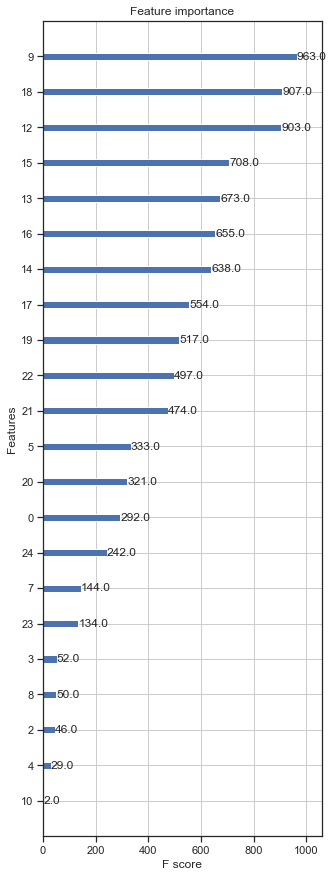

In [28]:
# final model 
xgb_model = XGBRegressor(colsample_bytree = 0.6,
                         learning_rate = 0.03,
                         max_depth = 7,
                         min_child_weight = 4,
                         n_estimators = 500,
                         nthread = 4,
                         objective = 'reg:linear', 
                         silent = 1,
                         subsample = 0.7,
                         random_state =27 
                         )

xgb_model_deploy = xgb_model.fit(X_tr, y)
prediction  = xgb_model_deploy.predict(X_tr)

#st_dev = (mean_squared_error(prediction, y) ** 0.5).round(-3)
st_dev = mean_squared_error(prediction, y) ** 0.5
xgb_model_deploy.st_dev = st_dev
    
plt.rcParams["figure.figsize"] = (5,15)
plot_importance(xgb_model_deploy)
plt.show()

### Evaluate on test data

In [29]:
#final_model = grid_search.best_estimator_

X_test = strat_test_set.drop(columns =["Fatigue", "Sl. No."], axis=1)
y_test = strat_test_set["Fatigue"].copy()

X_test_tr = pipe.transform(X_test)

y_test_pred = xgb_model_deploy.predict(X_test_tr)
final_r2 = r2_score(y_test, y_test_pred)
final_r2

0.9780250977906544

Text(0, 0.5, 'Predicted Fatigue Strength')

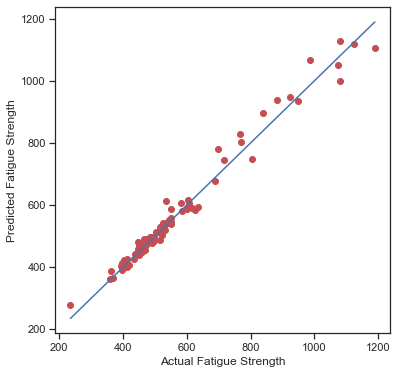

In [30]:
#plot
plt.figure(figsize=(6,6))
    
mx = max(max(y_test),max(y_test_pred))
mi = min(min(y_test),min(y_test_pred))
arr = np.linspace(mi, mx, 20)
plt.plot(arr, arr, c='b')
plt.scatter(y_test, y_test_pred, c='r')
plt.xlabel("Actual Fatigue Strength")
plt.ylabel("Predicted Fatigue Strength")

### 8. Model serving

In [31]:
full_pipeline_with_predictor = make_pipeline(pipe,
                                            xgb_model)
full_pipeline_with_predictor.fit(X, y)

[11:29:36] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[11:29:36] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('meanmedianimputer', MeanMedianImputer()),
                                 ('standardscaler', StandardScaler()),
                                 ('dropconstantfeatures',
                                  DropConstantFeatures()),
                                 ('dropduplicatefeatures',
                                  DropDuplicateFeatures()),
                                 ('smartcorrelatedselection',
                                  SmartCorrelatedSelection(estimator=LinearRegression(),
                                                           selection_method='model_performance',
                                                           threshold=0...
                              gamma=0, gpu_id=-1, grow_policy='depthwise',
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.03, max_bin=256,
                              max_cat_to_onehot

In [32]:
# validate 
y_test_pred = full_pipeline_with_predictor.predict(X_test)
final_r2 = r2_score(y_test, y_test_pred)
final_r2

0.9780250977906544

In [34]:
import pickle

In [43]:
xgb_model_deploy = full_pipeline_with_predictor
xgb_model_deploy.st_dev = st_dev
with open('xgb_model_deploy.pickle', 'wb') as f:
    pickle.dump(xgb_model_deploy, f)

In [44]:
X_test.iloc[0]

NT          865.000
THT         865.000
THt          30.000
THQCr        24.000
CT           30.000
Ct            0.000
DT           30.000
Dt            0.000
QmT          30.000
TT          550.000
Tt           60.000
TCr          24.000
C             0.350
Si            0.250
Mn            0.820
P             0.016
S             0.023
Ni            0.030
Cr            0.010
Cu            0.010
Mo            0.000
RedRatio    825.000
dA            0.070
dB            0.040
dC            0.000
Name: 20, dtype: float64

In [45]:
y_test_pred[0]

403.82285

In [46]:
st_dev

6.331967037514023